<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%208/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum 8/data/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df = df.drop(columns=['PassengerId','Cabin','Name','Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


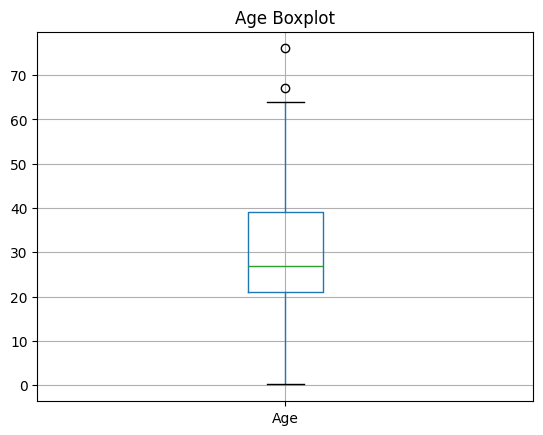

In [ ]:
df.boxplot(column=['Age'])
plt.title('Age Boxplot')
plt.show()

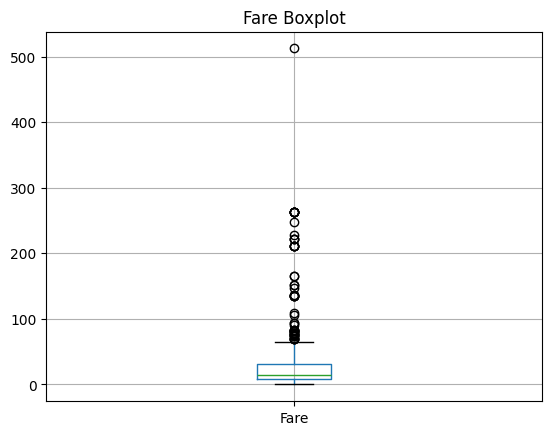

In [ ]:
df.boxplot(column=['Fare'])
plt.title('Fare Boxplot')
plt.show()


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

/tmp/ipython-input-935357202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-935357202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Data Analysis & Encoding Kategorikal

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


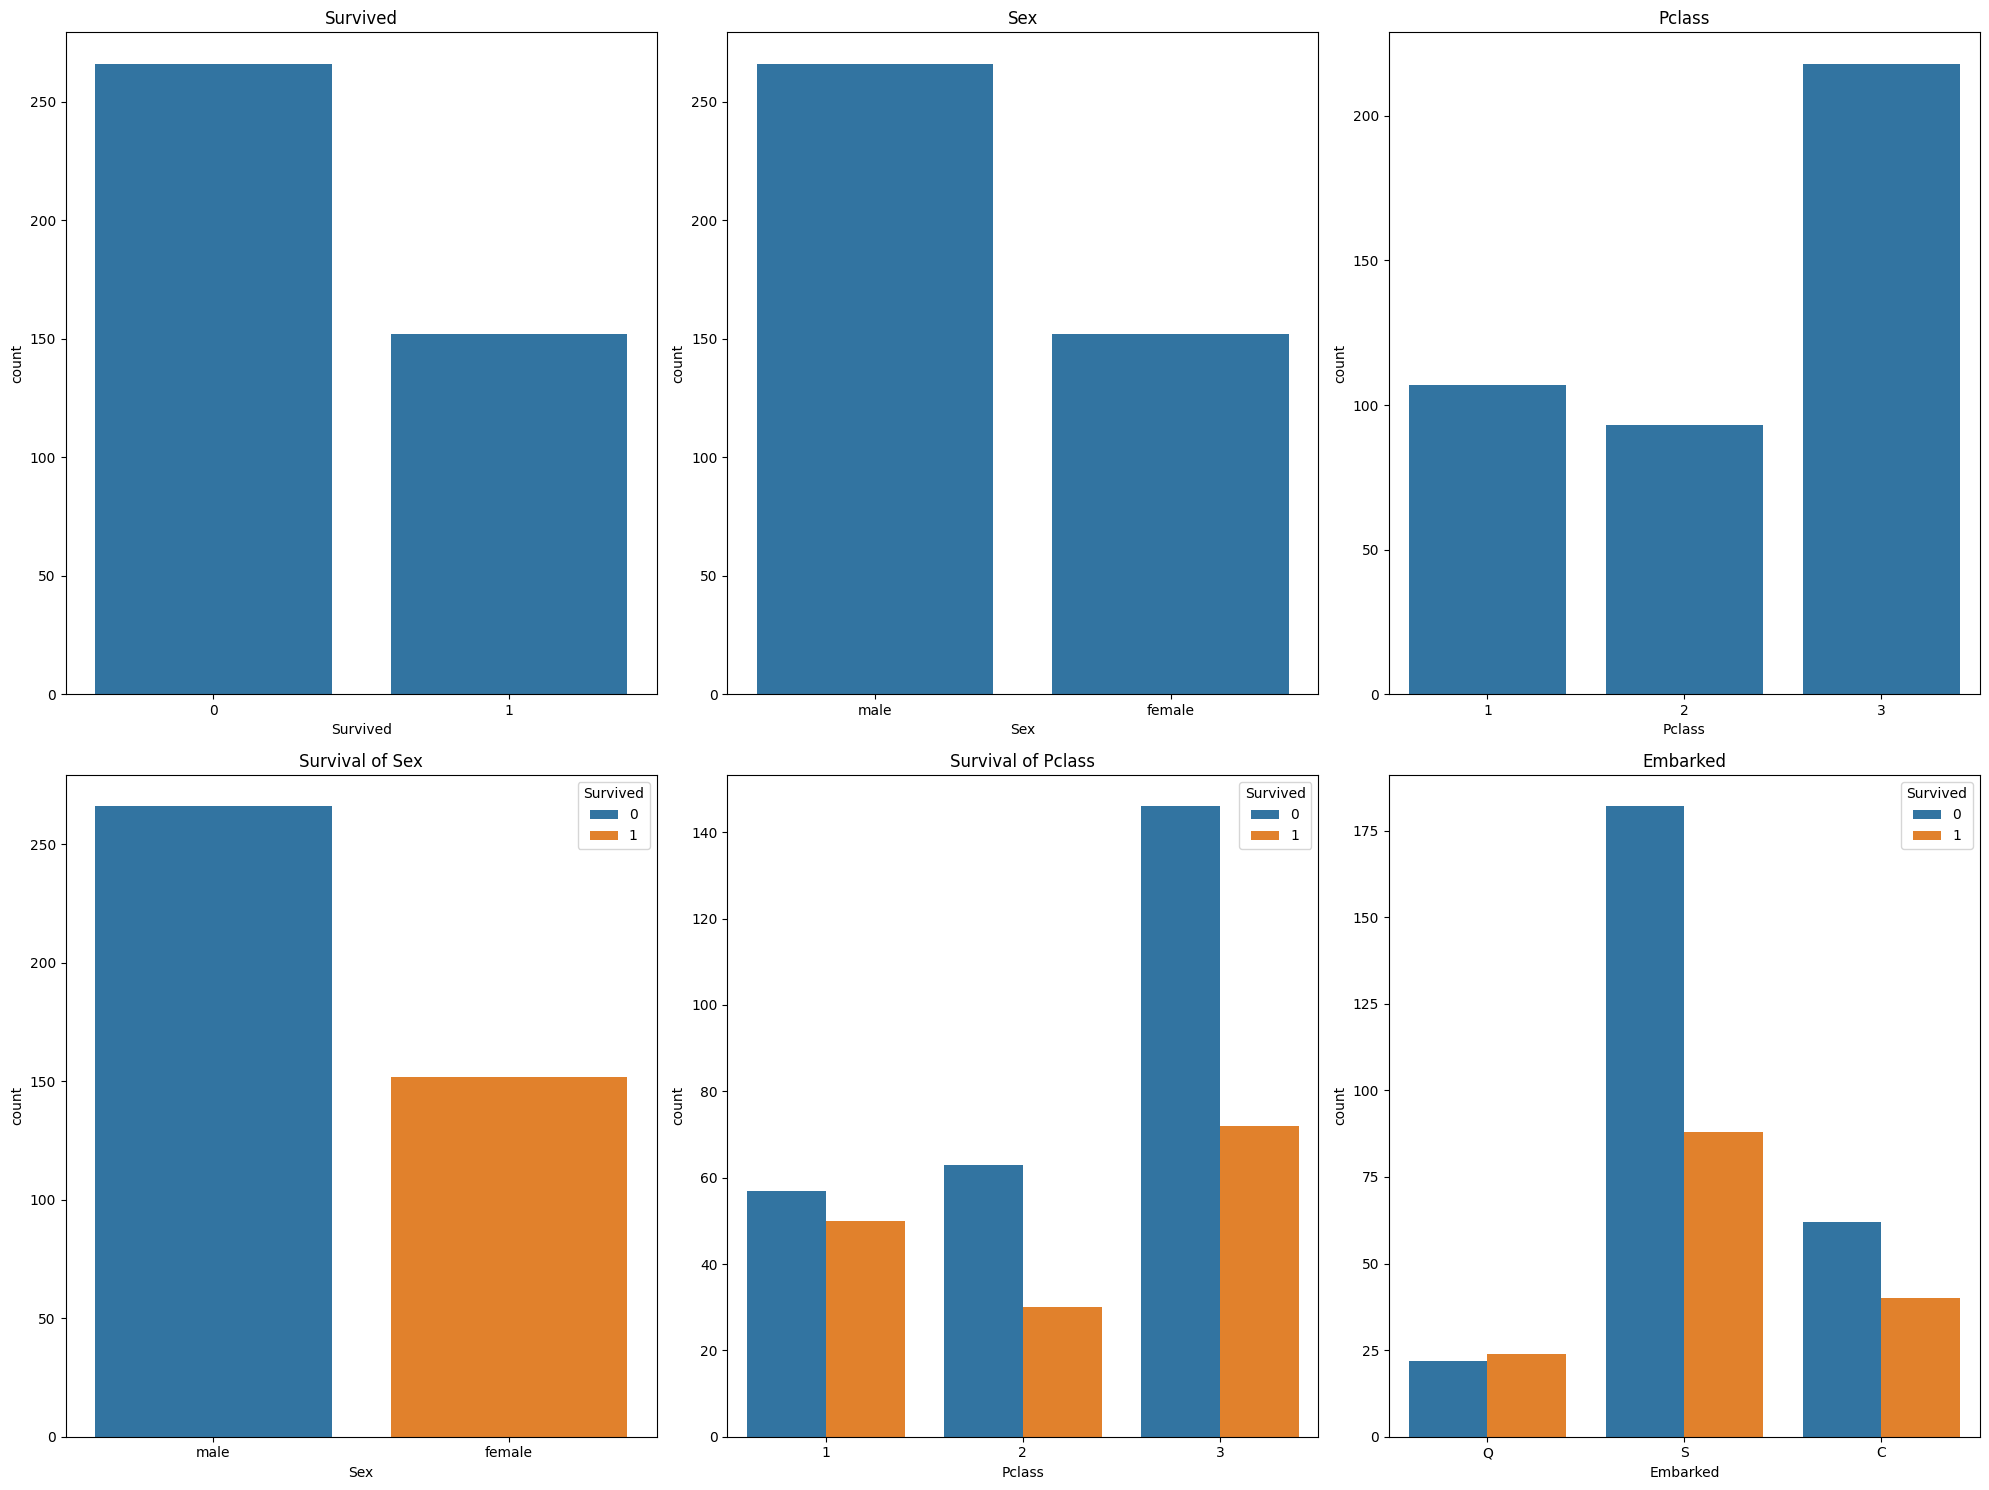

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = axes.flatten()

sns.countplot(x= 'Survived', data=df, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x= 'Sex', data=df, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x= 'Pclass', data=df, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x= 'Sex', hue='Survived', data=df, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x= 'Pclass', hue='Survived', data=df, ax=axes[4])
axes[4].set_title('Survival of Pclass')

sns.countplot(x= 'Embarked', hue='Survived', data=df, ax=axes[5])
axes[5].set_title('Embarked')

plt.tight_layout()
plt.show()

In [ ]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}

df.replace(replacements, inplace=True)

/tmp/ipython-input-1008071353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


In [ ]:
df.iloc[0:9]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0
5,0,3,0,14.0,0,0,9.2250,0
6,1,3,1,30.0,0,0,7.6292,2
7,0,2,0,26.0,1,1,29.0000,0
8,1,3,1,18.0,0,0,7.2292,1


Separating, Splitting, and Scaling Data


In [ ]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [ ]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Accuracy
train_pred_nb = nb_model.predict(X_train)
test_pred_nb = nb_model.predict(X_test)

print(f'Train Accuracy: {accuracy_score(Y_train, train_pred_nb)}')
print(f'Test Accuracy: {accuracy_score(Y_test, test_pred_nb)}')

Train Accuracy: 1.0
Test Accuracy: 1.0


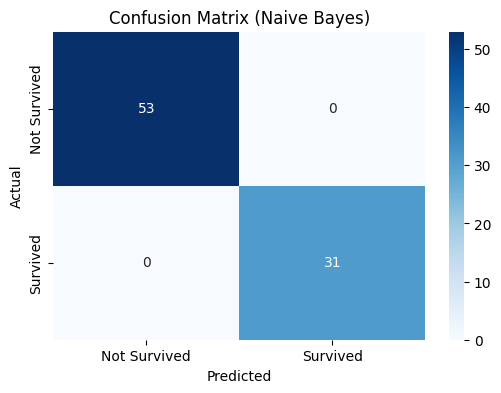

In [ ]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6, 4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

In [ ]:
print("\nClassification Report  (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report  (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Cross Validation Score:", cv_nb)
print("Mean Cross Validation Score:", cv_nb.mean())
print("Standard Deviation of Cross Validation Scores:", cv_nb.std())






Naive Bayes Cross Validation Accuracy (5-Fold):
Cross Validation Score: [1. 1. 1. 1. 1.]
Mean Cross Validation Score: 1.0
Standard Deviation of Cross Validation Scores: 0.0
